<a href="https://colab.research.google.com/github/Digitall-Ivan/Data_Analytics_course/blob/main/Ivan_Zakorchevnyi_HW3_Visualization_with_Seaborn.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Домашнє завдання: Статистичні візуалізації з Seaborn

## Опис завдання
У цьому домашньому завданні ви будете використовувати бібліотеку Seaborn для створення красивих статистичних візуалізацій. Seaborn має кращий стандартний стиль та спеціалізується на статистичних графіках.

**Опис колонок:**
- `datetime` - дата та час
- `season` - сезон (1=весна, 2=літо, 3=осінь, 4=зима)
- `holiday` - чи є день святковим (0=ні, 1=так)
- `workingday` - чи є день робочим (0=ні, 1=так)
- `weather` - погодні умови (1=ясно, 2=туман, 3=легкий дощ, 4=сильний дощ)
- `temp` - температура в градусах Цельсія
- `atemp` - як відчувається температура
- `humidity` - вологість (%)
- `windspeed` - швидкість вітру
- `casual` - кількість випадкових користувачів
- `registered` - кількість зареєстрованих користувачів
- `count` - загальна кількість орендованих велосипедів

## Підготовка даних


In [19]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [20]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

# Завантаження даних
df = pd.read_csv('/content/drive/MyDrive/I LOVE DATA EDU COURSE/RAWDATA/yulu_rental.csv')
df['datetime'] = pd.to_datetime(df['datetime'])
df.set_index('datetime', inplace=True)

# Встановлюємо стиль seaborn
sns.set_theme(style="whitegrid")

# Додамо додаткові колонки для аналізу
df['date'] = df.index.date
df['day'] = df.index.day
df['week'] = df.index.isocalendar().week
df['weekday_num'] = df.index.weekday
df['weekday'] = df.index.day_name()
df['year'] = df.index.year
df['month'] = df.index.month
df['hour'] = df.index.hour


---

## Завдання 1: Лінійний графік з довірчими інтервалами

**Завдання:**
Побудуйте лінійний графік середньої кількості оренд помісячно з довірчими інтервалами (confidence intervals) рівними 1 стандартному відхиленню.

**УВАГА!** В лекції ми будували подібний графік, але там були дані по номеру місяця, а тут треба зобразити дані в розрізі місяць_рік.

В якості підказки вам наведений код для створення колонки, яка містить `місяць_рік`. Як її використати - вже питання до вас :)

Очікуваний результат:
![](https://drive.google.com/uc?id=1uVKqfY1VlhVMaM3wu99uVGT1f7S0Vf8S)

**Питання для інтерпретації:**
- В які місяці найбільша невизначеність в даних?

In [3]:
df['month_year'] = df.index.to_period('M')
df['month_year']  = df.month_year.astype(str)

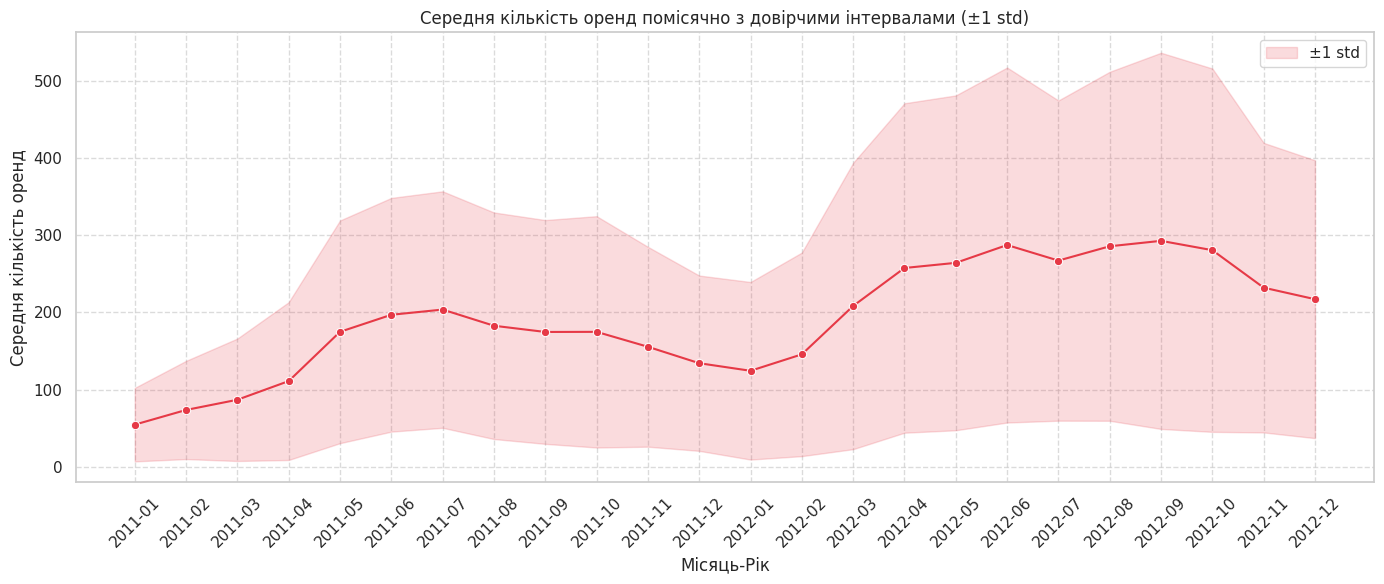

In [4]:
df_grouped = df.groupby('month_year')['count']
mean_counts = df_grouped.mean()
std_counts = df_grouped.std()
summary_df = (
    pd.DataFrame({
        'month_year': mean_counts.index,
        'mean': mean_counts.values,
        'std': std_counts.values
    })
)
plt.figure(figsize=(14, 6))
sns.lineplot(
    data=summary_df,
    x='month_year',
    y='mean',
    marker='o',
    color='#e63946'
)
plt.fill_between(
    summary_df['month_year'],
    summary_df['mean'] - summary_df['std'],
    summary_df['mean'] + summary_df['std'],
    color='#e63946',
    alpha=0.18,
    label='±1 std'
)

plt.title('Середня кількість оренд помісячно з довірчими інтервалами (±1 std)')
plt.xlabel('Місяць-Рік')
plt.ylabel('Середня кількість оренд')
plt.xticks(rotation=45)
plt.grid(True, which='both', linestyle='--', alpha=0.7)
plt.legend()
plt.tight_layout()
plt.show()

***В які місяці найбільша невизначеність в даних?*** Судячи з візуальної оцінки найбільша невизначеність спостерігається з квітня 2012 до жовтня 2012 року.

## Завдання 2: Порівняння стилів - Pandas vs Seaborn гістограма

**Завдання:**
Побудуйте гістограму розподілу температури двома способами - з Pandas та Seaborn - та порівняйте візуальний вигляд. Задайте однакову кількість бінів в цих візуалізаціях, відмінну від стандартної. В візуалізації Seaborn додайте параметр при побудові `kde=True`.

**Функція Seaborn: `sns.histplot()`**

Можна побудувати окремо два графіки. Але для тих, хто хоче складніше - побудуйте ці 2 графіки на 1 фігурі.

**Дайте відповідь на питання:**
1. Яка візуальна різниця між Pandas та Seaborn гістограмами?
2. Що за лінія додаткова на графіку в Seaborn? Як вона називається і як ви б її описали своїми словами?

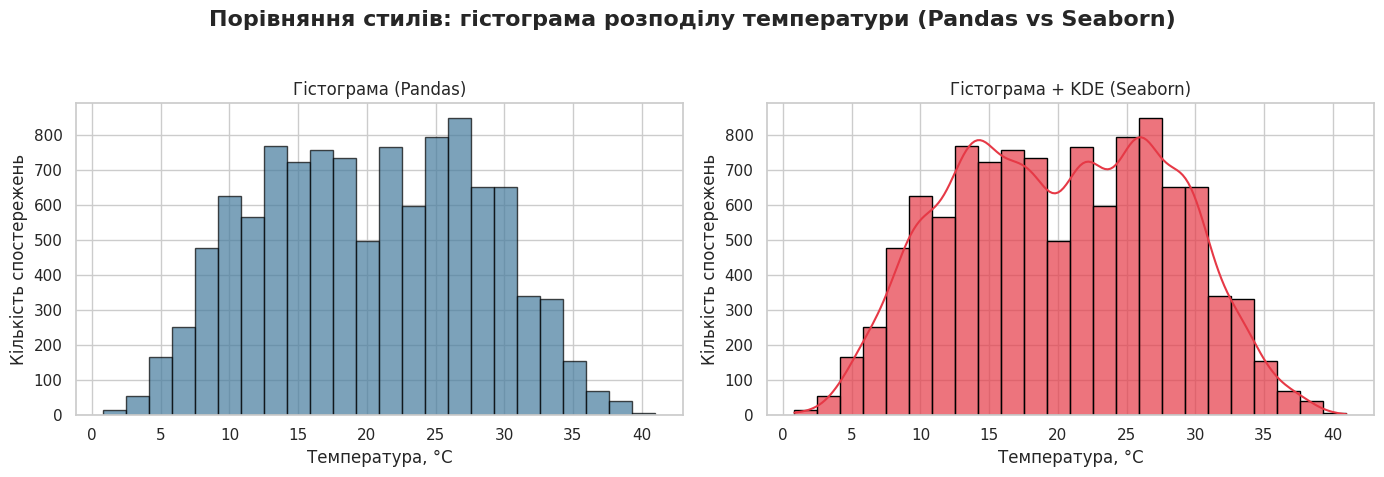

In [6]:
bins_num = 24

fig, axs = plt.subplots(1, 2, figsize=(14, 5))
fig.suptitle('Порівняння стилів: гістограма розподілу температури (Pandas vs Seaborn)', fontsize=16, fontweight='bold')

# Pandas
df['temp'].plot(
    kind='hist',
    bins=bins_num,
    color='#457b9d',
    alpha=0.7,
    edgecolor='black',
    ax=axs[0]
)
axs[0].set_title('Гістограма (Pandas)')
axs[0].set_xlabel('Температура, °C')
axs[0].set_ylabel('Кількість спостережень')

# Seaborn
sns.histplot(
    data=df,
    x='temp',
    bins=bins_num,
    kde=True,
    color='#e63946',
    alpha=0.7,
    edgecolor='black',
    ax=axs[1]
)
axs[1].set_title('Гістограма + KDE (Seaborn)')
axs[1].set_xlabel('Температура, °C')
axs[1].set_ylabel('Кількість спостережень')

plt.tight_layout(rect=[0, 0.03, 1, 0.95])
plt.show()

***Яка візуальна різниця між Pandas та Seaborn гістограмами?*** Візуальна різниця в основному через додаткову плавну криву. По стилям та стовпчикам візуально різниця малопомітна.
***Що за лінія додаткова на графіку в Seaborn? Як вона називається і як ви б її описали своїми словами?*** Така лінія — це крива щільності ймовірності (Kernel Density Estimate).Вона згладжує “ступінчасту” гістограму у суцільну лінію, показуючи загальний розподіл і піки. Як видно на гістограмі є окремі високі стовпчики, в цьому випадку крива щільності допомагає зрозуміти, чи це одиничний сплеск чи реальний пік у розподілі.

## Завдання 3: Box Plot порівняння - Pandas vs Seaborn

**Завдання:**
Побудуйте box plot для кількості погодинних оренд велосипедів за погодними умовами з Pandas та Seaborn.

**Функція Seaborn: `sns.boxplot()`**

Можна побудувати окремо два графіки. Але для тих, хто хоче складніше - побудуйте ці 2 графіки на 1 фігурі.

Просунуте доповнення:
- підпишіть погодні умови їх інтерпретацією з опису даних в обох графіках

**Дайте відповідь на питання:**
- Яка візуальна різниця між Pandas та Seaborn бокс-плотами?

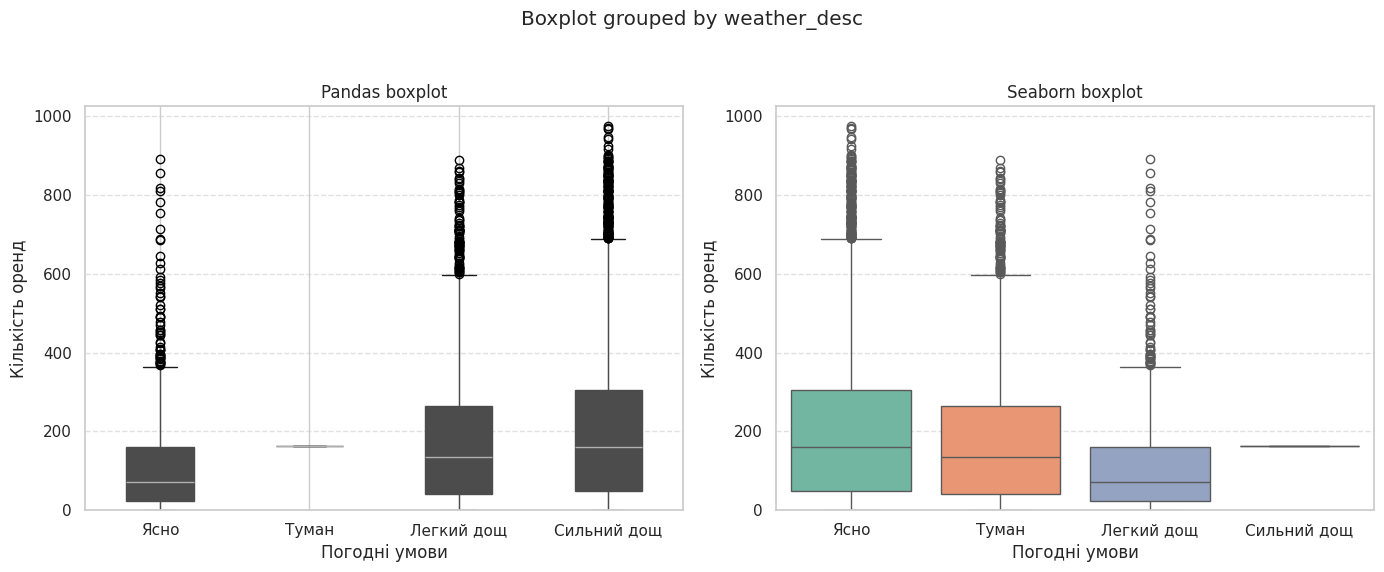

In [9]:
weather_map = {
    1: 'Ясно',
    2: 'Туман',
    3: 'Легкий дощ',
    4: 'Сильний дощ'
}
df['weather_desc'] = df['weather'].map(weather_map)
order = ['Ясно', 'Туман', 'Легкий дощ', 'Сильний дощ']

fig, axs = plt.subplots(1, 2, figsize=(14, 6))
fig.suptitle('Порівняння Box Plot: Pandas vs Seaborn\nКількість погодинних оренд за погодними умовами', fontsize=16, fontweight='bold')

# Box Plot Pandas
df.boxplot(column='count', by='weather_desc', ax=axs[0], grid=True, patch_artist=True)
axs[0].set_title('Pandas boxplot')
axs[0].set_xlabel('Погодні умови')
axs[0].set_ylabel('Кількість оренд')
axs[0].set_xticklabels(order)
axs[0].set_ylim(bottom=0)
axs[0].grid(axis='y', linestyle='--', alpha=0.6)

# Box Plot Seaborn
sns.boxplot(data=df, x='weather_desc', y='count',hue='weather_desc', order=order, ax=axs[1], palette='Set2', legend=False )
axs[1].set_title('Seaborn boxplot')
axs[1].set_xlabel('Погодні умови')
axs[1].set_ylabel('Кількість оренд')
axs[1].set_ylim(bottom=0)
axs[1].grid(axis='y', linestyle='--', alpha=0.6)

plt.tight_layout(rect=[0, 0.03, 1, 0.95])
plt.show();

***Яка візуальна різниця між Pandas та Seaborn бокс-плотами?*** Візуальна різниця в кольоровій гаммі та більш презентабельному вигляді бокс-плоту, побудованому в Seaborn

<!-- - -->
## Завдання 4: Heatmap кореляційної матриці

**Завдання:**
Створіть із Seaborn кореляційну матрицю з забарвленням heatmap (колір відповідає величині значення в клітинці) числових змінних в наших даних з анотаціями значень.

**Дайте відповіді на питання по графіку:**
1. Які змінні найсильніше корелюють з загальною кількістю оренди (count)?
2. Яка кореляція між temp та atemp? Чому?
3. Які змінні мають негативну кореляцію?


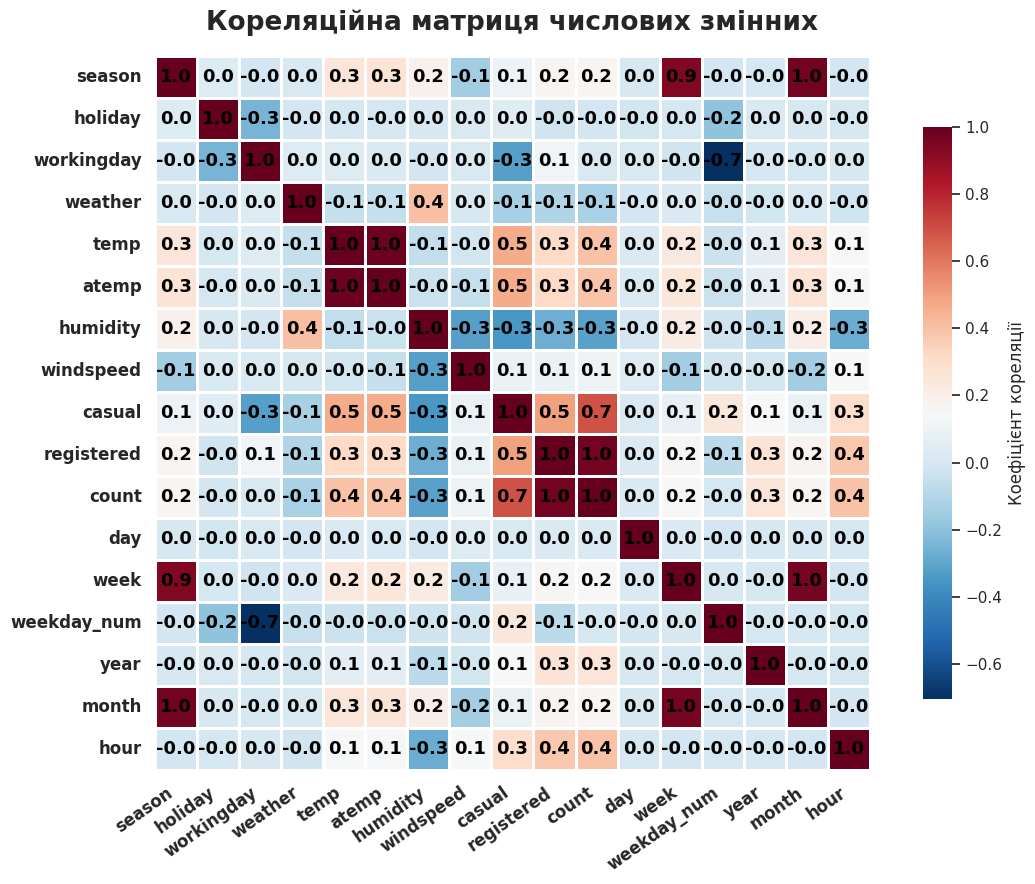

In [23]:
num_cols = df.select_dtypes(include='number')
corr_matrix = num_cols.corr()

plt.figure(figsize=(12, 9))
sns.set(font_scale=1.0)

sns.heatmap(
    corr_matrix,
    annot=True,
    fmt='.1f',
    cmap='RdBu_r',
    linewidths=1.0,
    square=True,
    cbar_kws={"shrink": .8, "label": "Коефіцієнт кореляції"},
    annot_kws={"size": 13, "weight": "bold", "color": "black"}
)

plt.title('Кореляційна матриця числових змінних', fontsize=19, fontweight='bold', pad=18)
plt.xticks(rotation=35, ha='right', fontsize=12, weight='bold')
plt.yticks(rotation=0, fontsize=12, weight='bold')
plt.tight_layout()
plt.show()

**Які змінні найсильніше корелюють з загальною кількістю оренди (count)?** Найбільша позитивна кореляція для змінних casual, temp та atemp.
***Яка кореляція між temp та atemp? Чому?*** Кореляція між temp та atemp близька до 1 (дуже висока), бо temp — це фактична температура,
atemp — це “як відчувається” температура (apparent temperature).
Ці змінні майже завжди йдуть разом: температура, що відчувається, зазвичай дуже схожа на реальну, тому така сильна кореляція.
***Які змінні мають негативну кореляцію?*** workingday і casual: приблизно -0.3 (випадкові користувачі рідше беруть велосипеди у робочі дні), humidity та кілька інших змінних злегка негативні (до -0.3), windspeed — слабка негативна кореляція із temp, atemp, casual; weekday_num та weather: близько -0.7 (але це, ймовірно, формальна залежність від кодування ознак, а не реальний взаємозв’язок).

## Завдання 5: Violin Plot для глибокого аналізу розподілів

**Завдання:**
Створіть violin plot для аналізу розподілу оренди за сезонами.

Дайте відповіді на питання:

**Питання для інтерпретації:**
1. Що показує "товщина" violin plot?
2. В якому сезоні найбільша варіабельність оренди?
3. Яка перевага violin plot над звичайним box plot?


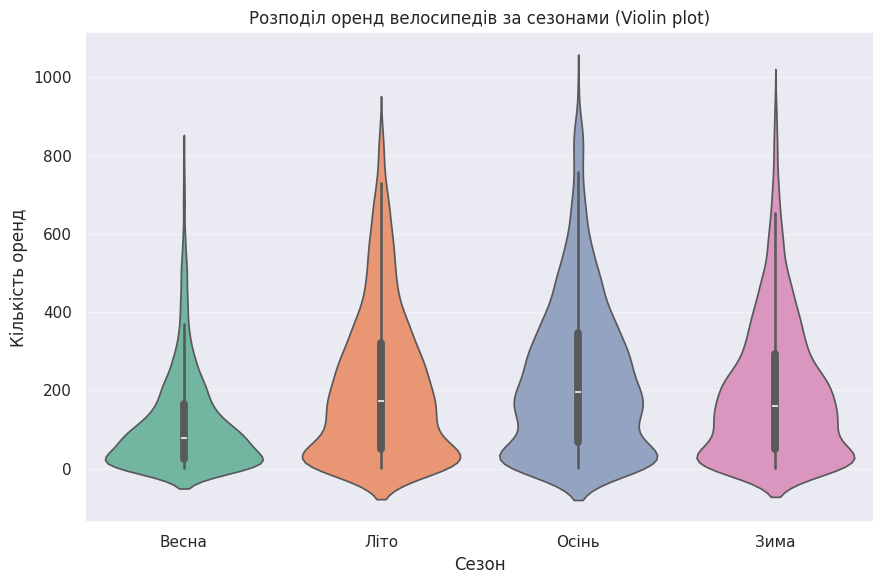

In [25]:
season_map = {1: 'Весна', 2: 'Літо', 3: 'Осінь', 4: 'Зима'}
df['season_name'] = df['season'].map(season_map)
order = ['Весна', 'Літо', 'Осінь', 'Зима']

plt.figure(figsize=(9, 6))
sns.violinplot(
    data=df,
    x='season_name',
    y='count',
    hue = 'season_name',
    order=order,
    palette='Set2',
    inner='box',
    legend=False
)
plt.title('Розподіл оренд велосипедів за сезонами (Violin plot)')
plt.xlabel('Сезон')
plt.ylabel('Кількість оренд')
plt.grid(axis='y', alpha=0.4)
plt.tight_layout()
plt.show()

***Що показує "товщина" violin plot?*** Товщина (ширина) “скрипки” у певній точці по вертикалі показує, скільки даних (оренд) зустрічається біля цього значення.
***В якому сезоні найбільша варіабельність оренди?*** Найбільша варіабельність - осінь, що є найбільш “роздутою” по вертикалі скрипкою.
***Яка перевага violin plot над звичайним box plot?*** Violin plot показує не тільки медіану, квартилі й викиди (як box plot), а й повну реальну форму розподілу: де є кілька “піків”, наскільки сильно дані згущені або розкидані.

## Завдання 6: Pairplot для мультиваріативного аналізу

**Завдання:**
Створіть pairplot для аналізу взаємозв'язків між ключовими змінними `'temp', 'humidity', 'windspeed', 'count'` . В якості візуальної розбивки за категоріями (параметр `hue`) додайте сезон.

Дайте відповіді на питання:

**Питання для інтерпретації:**
1. Між якими змінними спостерігається найсильніший лінійний зв'язок?
2. Яка характеристика найбільше змінюється від сезону?

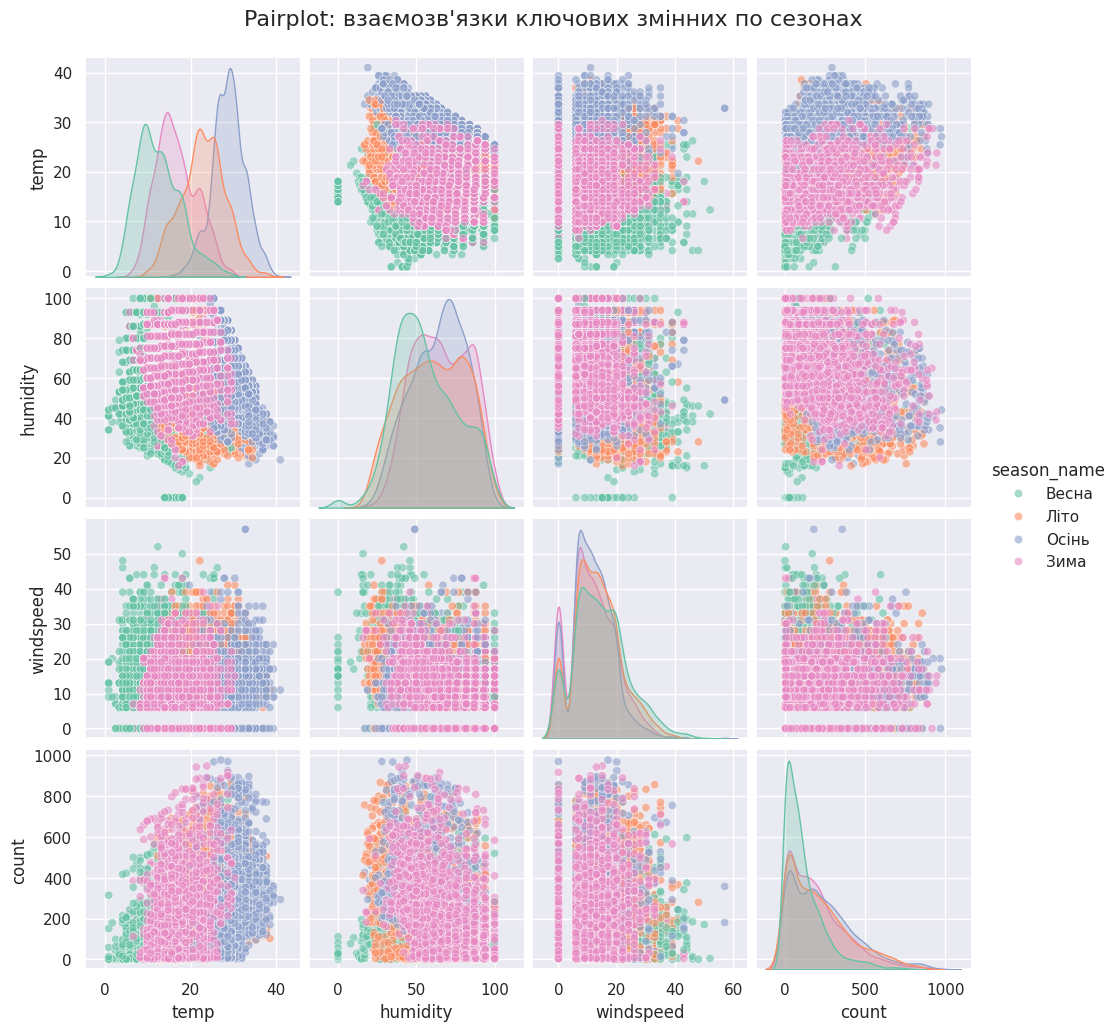

In [26]:
season_map = {1: 'Весна', 2: 'Літо', 3: 'Осінь', 4: 'Зима'}
df['season_name'] = df['season'].map(season_map)

sns.pairplot(
    df,
    vars=['temp', 'humidity', 'windspeed', 'count'],
    hue='season_name',
    palette='Set2',
    diag_kind='kde',
    plot_kws={'alpha': 0.6}
)
plt.suptitle('Взаємозв\'язки ключових змінних по сезонах', fontsize=16, y=1.03)
plt.show()

***Між якими змінними спостерігається найсильніший лінійний зв'язок?*** temp ↔ count — найсильніший позитивний лінійний зв’язок.
На відповідному графіку видно явний тренд: зі зростанням температури кількість оренд зростає майже лінійно для всіх сезонів.
Слабший, але досить помітний зв’язок: humidity ↔ count (негативний,тобто, зі збільшенням вологості оренд стає менше, але не дуже явно).
***Яка характеристика найбільше змінюється від сезону?***temp (температура). На діагональних графіках кривоъ щільності розподілу для temp майже не видно перекриття між сезонами:влітку - майже всі значення високі, взимку - низькі, весна та осінь - проміжні значення.

## Завдання 7: Joint Plot для детального аналізу двох змінних

**Завдання:**
Проаналізуйте залежність між температурою та орендою за допомогою joint plot. В якості візуальної розбивки за категоріями (параметр `hue`) додайте `workingday`.

Дайте відповіді на питання:

**Питання для інтерпретації:**
1. Що показують графіки по краях?
2. Чи є різниця у поведінці користувачів у робочий і неробочий день?

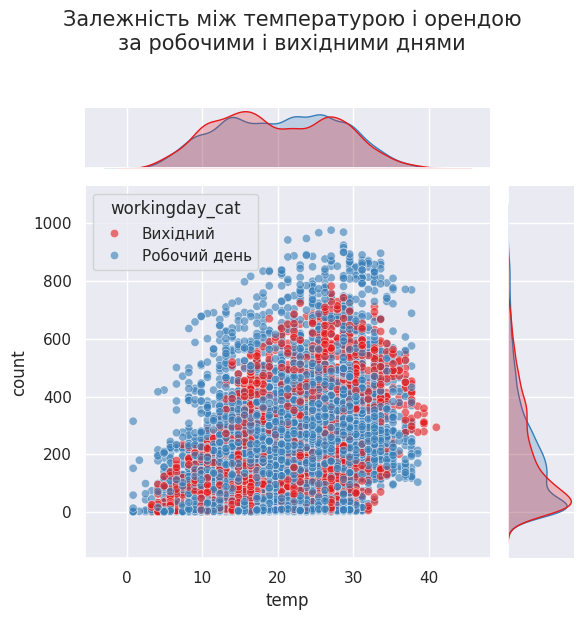

In [27]:
df['workingday_cat'] = df['workingday'].map({0: 'Вихідний', 1: 'Робочий день'})

sns.jointplot(
    data=df,
    x='temp',
    y='count',
    hue='workingday_cat',
    kind='scatter',
    palette='Set1',
    alpha=0.6,
    marginal_kws={'common_norm': False}
)

plt.suptitle('Залежність між температурою і орендою\nза робочими і вихідними днями', y=1.03, fontsize=15)
plt.tight_layout()
plt.show()

***Що показують графіки по краях?*** Горизонтальний графік (угорі): розподіл температури (temp) окремо для робочих і вихідних. Вертикальний графік (праворуч): розподіл кількості оренд (count) окремо для робочих і вихідних.
**Чи є різниця у поведінці користувачів у робочий і неробочий день? **Незначна різниця у поведінці спостерігається: У вихідний день більше оренд при високих температурах (пік вище). Розподіл по count компактніший — менше піків великої кількості оренд. У робочий день кількість оренд трохи менша, навіть при тій самій температурі. На графіку видно великий розкид значень count при високих температурах, порівняно з вихідними. Таким чином, можна зробити висновок, що у вихідні більше людей орендують велосипеди в теплу погоду, тоді як у робочі дні оренд трохи менше навіть якщо тепло.